# PYMC GLM

<br>

***
***
***

<br>

# Imports

In [11]:
!pip install --upgrade bambi

  Using cached pymc-4.0.0-py3-none-any.whl (554 kB)
  Using cached aeppl-0.0.31-py3-none-any.whl
  Using cached aesara-2.6.6-py3-none-any.whl
  Attempting uninstall: aesara
    Found existing installation: aesara 2.7.9
    Uninstalling aesara-2.7.9:
      Successfully uninstalled aesara-2.7.9
  Attempting uninstall: aeppl
    Found existing installation: aeppl 0.0.33
    Uninstalling aeppl-0.0.33:
      Successfully uninstalled aeppl-0.0.33
  Attempting uninstall: pymc
    Found existing installation: pymc 4.1.4
    Uninstalling pymc-4.1.4:
      Successfully uninstalled pymc-4.1.4


In [10]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.0.0


In [4]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

# Fake Data

In [5]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

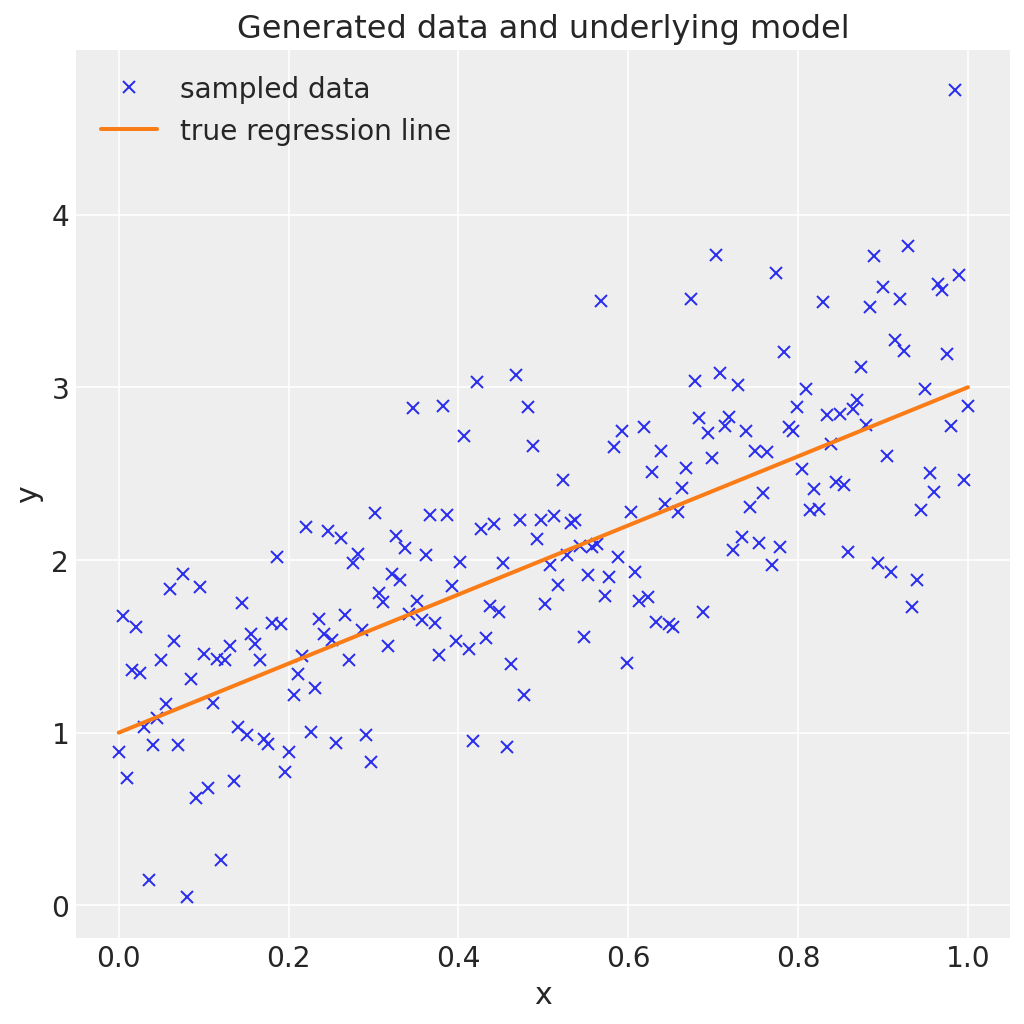

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

# Estimating the Model

In [8]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    # idata = sample(3000)